In [13]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
alexa_df=pd.read_csv('F:/amazon_alexa.tsv',sep='\t')
alexa_df.head(25)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [8]:
alexa_df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [9]:
alexa_df.shape

(3150, 5)

In [11]:
alexa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [20]:
stemmer=PorterStemmer()

(array([ 257.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

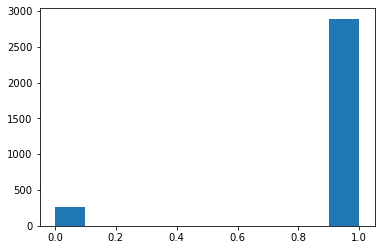

In [52]:
#visualization part
#To check wether the data is balanced or imbalanced
import matplotlib.pyplot as plt
plt.hist(alexa_df['feedback'])

In this graph shows that the data is imbalanced, so considering the 'F1 score' for the accuary of model

In [37]:
def preprocessing(text):
    text=text.lower()
    text=re.sub('[^a-z]' ,' ',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text=" ".join(text)
    return text

In [38]:
preprocessing('i love my country')

'love countri'

In [39]:
alexa_df['verified_reviews']=alexa_df['verified_reviews'].apply(preprocessing)

In [40]:
alexa_df['verified_reviews']

0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti great mostli use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [41]:
alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,love,1
2,4,31-Jul-18,Walnut Finish,sometim play game answer question correctli al...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learn dinosaur control li...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [45]:
x_train,x_test,y_train,y_test=train_test_split(alexa_df['verified_reviews'],alexa_df['feedback'],test_size=0.20,random_state=1)

In [47]:
Cv=CountVectorizer()

x_train=Cv.fit_transform(x_train).toarray()
x_test=Cv.transform(x_test).toarray()

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
models=[DecisionTreeClassifier(),LogisticRegression()]

In [51]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(str(model))
    print(classification_report(y_test,pred))
    print('='*50)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        46
           1       0.97      0.96      0.96       584

    accuracy                           0.93       630
   macro avg       0.73      0.76      0.75       630
weighted avg       0.93      0.93      0.93       630

LogisticRegression()
              precision    recall  f1-score   support

           0       0.70      0.35      0.46        46
           1       0.95      0.99      0.97       584

    accuracy                           0.94       630
   macro avg       0.82      0.67      0.72       630
weighted avg       0.93      0.94      0.93       630

